# Setting up Python Virtual Environment

With Python3, you can run

`python3 -m venv [name]`

where `[name]` is the name you want to use for your virtual environment.

We will run

`python3 -m venv img`


You then want to "activate" your virtual environment which will setup your environment to use the python in your virtual environment rather than the system python. <b>This allows you to created isolated environments for each of your projects</b>. 

`source img/bin/activate`

The advantage of this approach is that you can have libraries installed where needed and always have the correct versions.

We need to install some libraries into our virtual environment:

`pip install tensorflow`

`pip install keras`

`pip install jupyter`

# Setting up our data

In [43]:
# For visualization
from matplotlib import pyplot

# Used for data manipulation
import numpy as np

# Utility function for loading the Cifar-10 labelled dataset
from keras.datasets import cifar10

Load the Cifar-10 dataset. You can find more information here:

https://www.cs.toronto.edu/~kriz/cifar.html

<b>Classes</b>										
0) airplane										
1) automobile										
2) bird										
3) cat										
4) deer										
5) dog										
6) frog										
7) horse										
8) ship										
9) truck										

In [85]:
classes = {
    0: "Airplane",
    1: "Automobile",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck"
}

### Train/Test Split

Since our models are being optimized against our training data, we use a different set of data for model validation. This way we can identify any issues with <b>overfitting</b> where a model learns the intricacies of the training data but fails to generalize to data contained outside the training data.

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 147s 1us/step


In [41]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [44]:
x_train = x_train.astype(np.float)
x_test = x_test.astype(np.float)

x_train /= 255
x_test /= 255

In [45]:
x_train.shape

(50000, 32, 32, 3)

In [46]:
y_train.shape

(50000, 1)

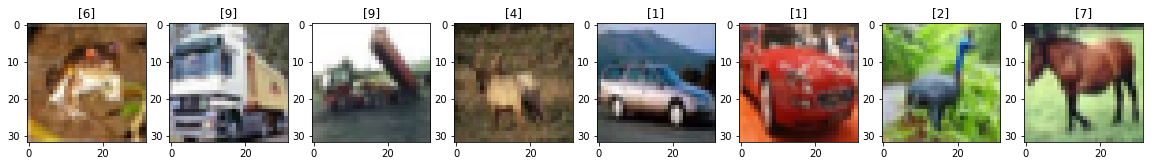

In [47]:
pyplot.figure(figsize=(20,10))

nimg = 8
for i in range(nimg):
    pyplot.subplot(1,nimg,i+1)
    pyplot.title(f"{y_train[i]}")
    pyplot.imshow(x_train[i])

In [48]:
from keras.utils import to_categorical

Notice that the labels (i.e. y_train and y_eval) are given as integer labels. We need to convert these to 10-dimensional vectors. This is because our neural network will output a probability vector with one probability assigned to each class.

In [49]:
y_train[0]

array([6], dtype=uint8)

We use the keras util `to_categorical` to convert the labels to the vector format.

In [50]:
y_train_vec = to_categorical(y_train, num_classes=10)
y_test_vec = to_categorical(y_test, num_classes=10)

In [51]:
y_train_vec[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Fully Connected Neural Network

In [54]:
from keras.layers import Input, Dense, Activation, Flatten
from keras.optimizers import SGD
from keras.models import Model

In [55]:
# Get the size of the input images
# Height, Width, Channels
h, w, c = x_train[0].shape

In [133]:
I = Input(shape=(h,w,c))

x = Flatten()(I)

x = Dense(60)(x)
x = Activation("relu")(x)

# We output 10 values, one per class
x = Dense(10)(x)

# We use a "softmax" activation to make the 10 dimensional output vector
# satisfy the conditions of being a probability vector
x = Activation("softmax")(x)

fcnn = Model(inputs=I, outputs=x)

fcnn.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01), metrics=["accuracy"])

In [134]:
fcnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 60)                184380    
_________________________________________________________________
activation_60 (Activation)   (None, 60)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                610       
_________________________________________________________________
activation_61 (Activation)   (None, 10)                0         
Total params: 184,990
Trainable params: 184,990
Non-trainable params: 0
_________________________________________________________________


### Parameter Counting

<b>Dense1</b>: 32 x 32 x 3 x 60 + 60 = 184380

<b>Dense2</b>: 60 x 10 + 10 = 610

In [144]:
fcnn.fit(x_train,
         y_train_vec,
         batch_size=32,
         epochs=10,
         validation_data=(x_test, y_test_vec))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 179us/step - loss: 1.9099 - acc: 0.3141 - val_loss: 1.8663 - val_acc: 0.3339
Epoch 2/10
50000/50000 [==============================] - 4s 72us/step - loss: 1.7358 - acc: 0.3845 - val_loss: 1.7121 - val_acc: 0.3919
Epoch 3/10
50000/50000 [==============================] - 4s 71us/step - loss: 1.6676 - acc: 0.4119 - val_loss: 1.6343 - val_acc: 0.4232
Epoch 4/10
50000/50000 [==============================] - 4s 72us/step - loss: 1.6195 - acc: 0.4298 - val_loss: 1.6934 - val_acc: 0.3959
Epoch 5/10
50000/50000 [==============================] - 4s 71us/step - loss: 1.5860 - acc: 0.4401 - val_loss: 1.5959 - val_acc: 0.4306
Epoch 6/10
50000/50000 [==============================] - 4s 70us/step - loss: 1.5589 - acc: 0.4520 - val_loss: 1.5901 - val_acc: 0.4328
Epoch 7/10
50000/50000 [==============================] - 4s 71us/step - loss: 1.5361 - acc: 0.4623 - val_loss: 1.6300 - val_ac

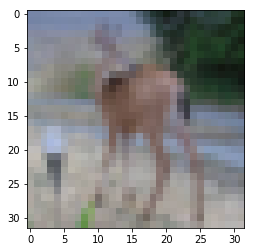

In [62]:
pyplot.imshow(x_test[100])

In [88]:
print(classes[y_test[100][0]])

Deer


<b>The true label is a deer</b>

In [67]:
test_image = x_test[0].reshape((1,32,32,3))
probs = fcnn.predict(test_image)

In [75]:
print(probs[0])

[0.01368408 0.09879979 0.1312418  0.46244636 0.00585568 0.22793977
 0.03022507 0.00271287 0.02162179 0.00547285]


In [86]:
classes[np.argmax(probs[0])]

'Cat'

<b>However, the network predicts a cat<b>

# LeNet-5 Convolutional Neural Network

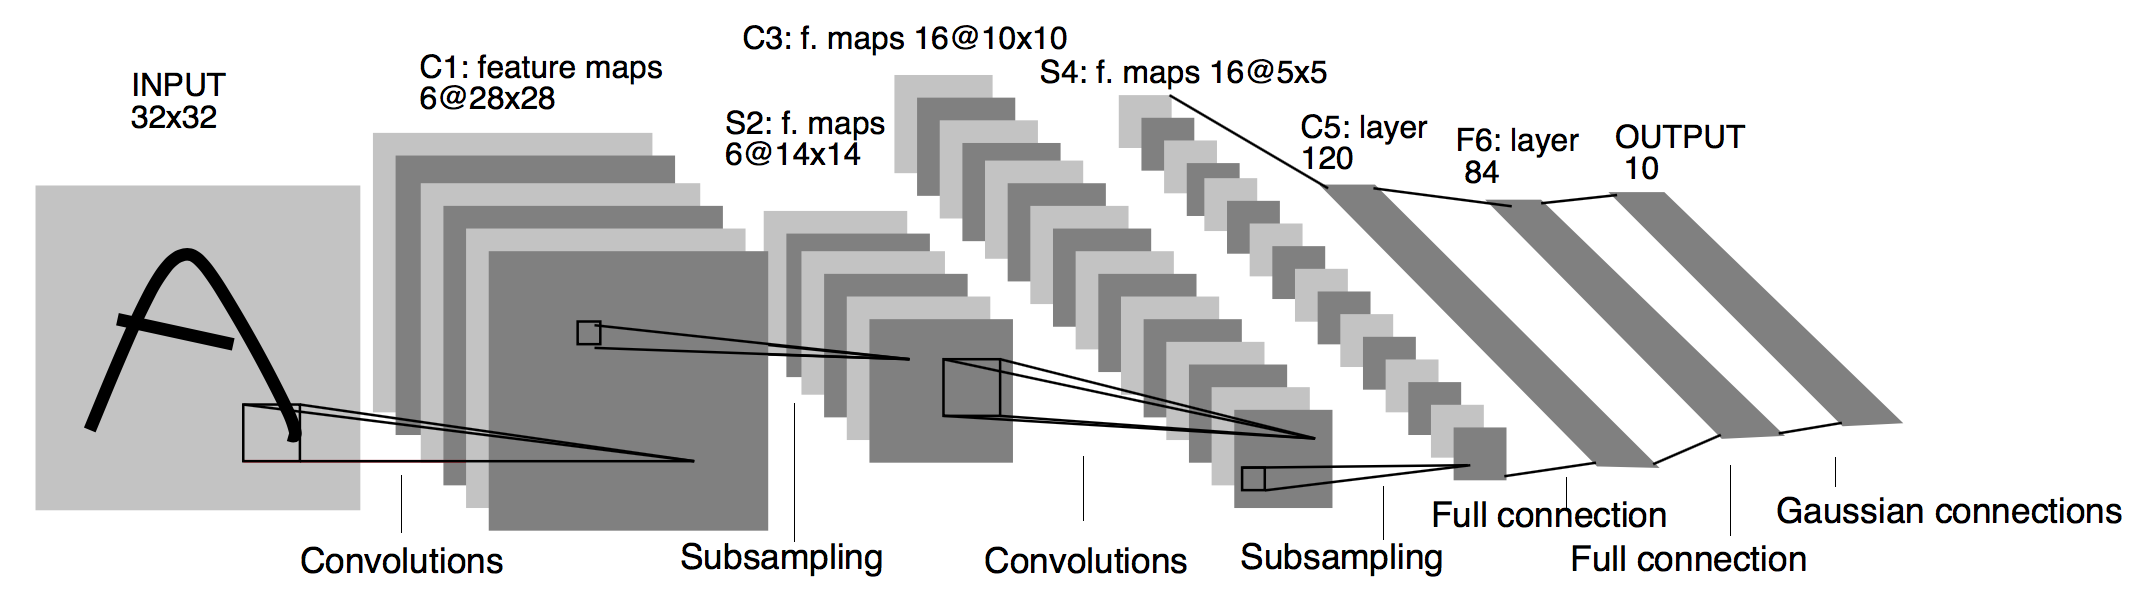

The LeNet-5 architecture was designed by Yann LeCun in 1998.

"LeNet-5 is our latest convolutional network designed for handwritten and machine-printed character recognition."

http://yann.lecun.com/exdb/lenet/

<b>New Concept</b>: Pooling is used to reduce the spatial dimension of an image and "pool" information together. This increases the <i>receptive field</i> of a neural network and helps reduce parameters.

We will use two different forms of pooling:

* Average Pooling: Takes the average value in the pooling field.

* Max Pooling: Takes the maximum value in the pooling field.

These operations are perfomred channel by channel (i.e. this does not change the number of channels).

In [116]:
from keras.layers import AveragePooling2D

In [122]:
I = Input(shape=(32,32,3))

x = Conv2D(6, kernel_size=(5,5))(I)
x = Activation("tanh")(x)
x = AveragePooling2D()(x)

x = Conv2D(16, kernel_size=(5,5))(x)
x = Activation("tanh")(x)
x = AveragePooling2D()(x)

x = Conv2D(120, kernel_size=(5,5))(x)

x = Flatten()(x)

x = Dense(84)(x)
x = Activation("tanh")(x)

x = Dense(10)(x)
x = Activation("softmax")(x)

lenet = Model(inputs=I, outputs=x)

lenet.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01), metrics=["accuracy"])

In [123]:
lenet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
activation_52 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d_5 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_53 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
average_pooling2d_6 (Average (None, 5, 5, 16)          0         
__________

## Parameter Counting

<b>Conv1</b>: (3 x 6 x 5 x 5) + 6 = 456

<b>Conv2</b>: (6 x 16 x 5 x 5) + 16 = 2416

<b>Conv3</b>: (16 x 120 x 5 x 5) + 120 = 48120

<b>Dense1</b>: 120 x 84 + 84 = 10164

<b>Dense2</b>: 84 x 10 + 10 = 850

In [124]:
lenet.fit(x_train,
         y_train_vec,
         batch_size=32,
         epochs=10,
         validation_data=(x_test, y_test_vec))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 18s 362us/step - loss: 1.9809 - acc: 0.2873 - val_loss: 1.8073 - val_acc: 0.3638
Epoch 2/10
50000/50000 [==============================] - 18s 364us/step - loss: 1.7452 - acc: 0.3850 - val_loss: 1.6897 - val_acc: 0.3992
Epoch 3/10
50000/50000 [==============================] - 18s 365us/step - loss: 1.6372 - acc: 0.4219 - val_loss: 1.5752 - val_acc: 0.4346
Epoch 4/10
50000/50000 [==============================] - 18s 368us/step - loss: 1.5615 - acc: 0.4442 - val_loss: 1.5264 - val_acc: 0.4555
Epoch 5/10
50000/50000 [==============================] - 18s 365us/step - loss: 1.5035 - acc: 0.4655 - val_loss: 1.5024 - val_acc: 0.4687
Epoch 6/10
50000/50000 [==============================] - 19s 372us/step - loss: 1.4502 - acc: 0.4825 - val_loss: 1.4569 - val_acc: 0.4809
Epoch 7/10
50000/50000 [==============================] - 19s 376us/step - loss: 1.4013 - acc: 0.4993 - val_loss: 1.

In [127]:
probs = lenet.predict(test_image)

In [130]:
classes[np.argmax(probs)]

'Cat'

<b>The network still predicts a cat<b>

# Another Architecture

<b>New Concept</b>: Dropout is used to reduce overfitting in a network. It effectively allows for training an ensemble of neural networks by randomly "dropping out" (i.e. omitting) a percentage of the nodes in the network during training. This reduces the network's reliance on any particular small subset of nodes.

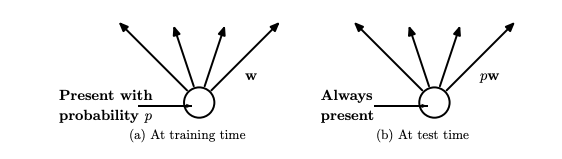

During inference, all nodes in the network are turned on and the weights are adjusted to reflect the fact that during learning, the incoming linear combinations were smaller than during inference (where all the nodes contribute).

In [136]:
from keras.layers import Dropout, MaxPool2D

In [142]:
I = Input(shape=(h, w, c))

x = Conv2D(32, kernel_size=3, padding="same")(I)
x = Activation("relu")(x)
x = Conv2D(32, kernel_size=3, padding="same")(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
x = Dropout(0.25)(x)

x = Conv2D(64, kernel_size=3, padding="same")(x)
x = Activation("relu")(x)
x = Conv2D(64, kernel_size=3, padding="same")(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

x = Dense(512)(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)

x = Dense(10)(x)
x = Activation("softmax")(x)

model = Model(inputs=I, outputs=x)

model.compile(loss="categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"])

In [140]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_74 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_75 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
__________

### Parameter Counting

<b>Conv1</b>: 3 x 32 x 3 x 3 + 32 = 896

<b>Conv2</b>: 32 x 32 x 3 x 3 + 32 = 9248

<b>Conv3</b>: 32 x 64 x 3 x 3 + 64 = 18496

<b>Conv4</b>: 64 x 64 x 3 x 3 + 64 = 36928

<b>Dense1</b>: 4096 x 512 + 512 = 2097664

<b>Dense2</b>: 512 x 10 + 10 = 5130

In [143]:
model.fit(x_train,
          y_train_vec,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test_vec))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 174s 3ms/step - loss: 2.0441 - acc: 0.2459 - val_loss: 1.7528 - val_acc: 0.3847
Epoch 2/10
50000/50000 [==============================] - 167s 3ms/step - loss: 1.6859 - acc: 0.3913 - val_loss: 1.5099 - val_acc: 0.4521
Epoch 3/10
50000/50000 [==============================] - 172s 3ms/step - loss: 1.5297 - acc: 0.4452 - val_loss: 1.4678 - val_acc: 0.4690
Epoch 4/10
50000/50000 [==============================] - 177s 4ms/step - loss: 1.4109 - acc: 0.4890 - val_loss: 1.3526 - val_acc: 0.5099
Epoch 5/10
50000/50000 [==============================] - 171s 3ms/step - loss: 1.3194 - acc: 0.5287 - val_loss: 1.2282 - val_acc: 0.5616
Epoch 6/10
50000/50000 [==============================] - 168s 3ms/step - loss: 1.2506 - acc: 0.5509 - val_loss: 1.1581 - val_acc: 0.5921
Epoch 7/10
50000/50000 [==============================] - 168s 3ms/step - loss: 1.1931 - acc: 0.5768 - val_loss: 1.1858 - 